In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis="columns", inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
# pd.to_numeric(df.TotalCharges)

In [8]:
# To ignore the errors and do the conversion for the space
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df.TotalCharges.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
# To Get all the null values
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.iloc[488]['TotalCharges']

' '

In [12]:
df.shape

(7043, 20)

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\users\ag20459\appdata\local\continuum\anaconda3\envs\codebasics2\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df1.TotalCharges.dtypes

dtype('float64')

In [16]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4501,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.70,762.45,No
2808,Male,0,Yes,Yes,2,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,97.10,184.15,No
6592,Male,0,No,No,26,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,No,Credit card (automatic),59.45,1507.00,No
681,Female,0,Yes,Yes,61,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),73.80,4616.05,No
3613,Male,1,No,No,55,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),50.05,2743.45,No


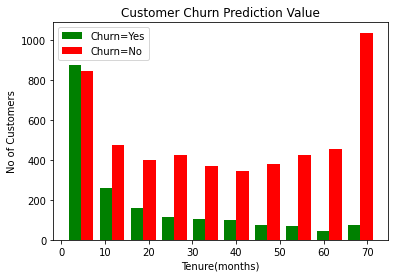

In [17]:
mc_churn_no = df1[df1.Churn=='No'].tenure
mc_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure(months)')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction Value')

plt.hist([mc_churn_yes, mc_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

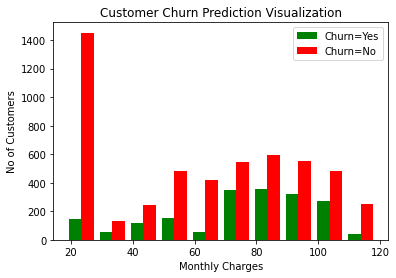

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes =='object':
            print(f"{columns}: {df[columns].unique()}")

In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

c:\users\ag20459\appdata\local\continuum\anaconda3\envs\codebasics2\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0}, inplace=True)


c:\users\ag20459\appdata\local\continuum\anaconda3\envs\codebasics2\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
for col in df1:
    print(f"{col}: {df1[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)

In [26]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [27]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1991,0,0,1,1,45,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1830,0,0,0,1,32,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4036,1,0,1,1,18,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5998,0,0,1,0,48,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5073,1,0,0,1,22,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [30]:
# Scaling
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [31]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1886,0,0,1,1,0.929577,1,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
4389,0,0,0,0,0.408451,1,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1646,1,0,1,1,0.816901,1,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
4155,1,1,0,0,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
5739,0,1,1,0,0.929577,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0


In [32]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [35]:
len(X_train.columns)

26

In [36]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [37]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5035 - accuracy: 0.7380
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4347 - accuracy: 0.7856
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4262 - accuracy: 0.7977
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4218 - accuracy: 0.7991
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4155 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4143 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4131 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4116 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4101 - accura

176/176 [==============================] - 2s 13ms/step - loss: 0.3551 - accuracy: 0.8268
Epoch 80/100
176/176 [==============================] - 2s 13ms/step - loss: 0.3542 - accuracy: 0.8309
Epoch 81/100
176/176 [==============================] - 2s 13ms/step - loss: 0.3551 - accuracy: 0.8300
Epoch 82/100
176/176 [==============================] - 2s 13ms/step - loss: 0.3547 - accuracy: 0.8293
Epoch 83/100
176/176 [==============================] - 2s 12ms/step - loss: 0.3531 - accuracy: 0.8293
Epoch 84/100
176/176 [==============================] - 2s 12ms/step - loss: 0.3521 - accuracy: 0.8315
Epoch 85/100
176/176 [==============================] - 2s 12ms/step - loss: 0.3539 - accuracy: 0.8331
Epoch 86/100
176/176 [==============================] - 2s 11ms/step - loss: 0.3533 - accuracy: 0.8309
Epoch 87/100
176/176 [==============================] - 2s 11ms/step - loss: 0.3518 - accuracy: 0.8290
Epoch 88/100
176/176 [==============================] - 2s 14ms/step - loss: 0.3508 - 

In [39]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [38]:
# import seaborn as sns
# cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# plt.figure(figsize = (10,7))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

### Under Sampling

In [40]:

count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [43]:
count_class_0, count_class_1

(5163, 1869)

In [42]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [46]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under sampling:')
print(df_test_under.Churn.value_counts())

Random under sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [47]:
X = df_test_under.drop('Churn',axis=1)
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [48]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [49]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.6873
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5208 - accuracy: 0.7475
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5039 - accuracy: 0.7505
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4981 - accuracy: 0.7545
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.7619
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4922 - accuracy: 0.7545
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4907 - accuracy: 0.7589
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.7602
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.7659
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4840 - accuracy: 0.7635
Epoch 11/

94/94 [==============================] - 1s 12ms/step - loss: 0.4015 - accuracy: 0.8171
Epoch 83/100
94/94 [==============================] - 1s 12ms/step - loss: 0.4022 - accuracy: 0.8174
Epoch 84/100
94/94 [==============================] - 1s 12ms/step - loss: 0.4000 - accuracy: 0.8171
Epoch 85/100
94/94 [==============================] - 1s 12ms/step - loss: 0.3986 - accuracy: 0.8194
Epoch 86/100
94/94 [==============================] - 1s 11ms/step - loss: 0.3984 - accuracy: 0.8171
Epoch 87/100
94/94 [==============================] - 1s 12ms/step - loss: 0.3989 - accuracy: 0.8221
Epoch 88/100
94/94 [==============================] - 1s 12ms/step - loss: 0.3970 - accuracy: 0.8187
Epoch 89/100
94/94 [==============================] - 1s 12ms/step - loss: 0.3956 - accuracy: 0.8217
Epoch 90/100
94/94 [==============================] - 1s 12ms/step - loss: 0.3950 - accuracy: 0.8214
Epoch 91/100
94/94 [==============================] - 1s 11ms/step - loss: 0.3944 - accuracy: 0.8207
Epo

### Method2: Oversampling

In [50]:
count_class_0, count_class_1

(5163, 1869)

In [59]:
df_class_1_over = df_class_1.sample(count_class_0, replace= True)

df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0) 
print('Random over sampling:')
print(df_test_over.Churn.value_counts())

Random over sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [60]:
X = df_test_over.drop('Churn',axis=1)
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [61]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5553 - accuracy: 0.7264
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4890 - accuracy: 0.7632
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4810 - accuracy: 0.7674
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4769 - accuracy: 0.7685
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4742 - accuracy: 0.7696
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4708 - accuracy: 0.7723
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4683 - accuracy: 0.7753
Epoch 8/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4664 - accuracy: 0.7753
Epoch 9/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4634 - accuracy: 0.7753
Epoch 10/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4610 - accura

259/259 [==============================] - 3s 13ms/step - loss: 0.3901 - accuracy: 0.8235
Epoch 68/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3892 - accuracy: 0.8225
Epoch 69/100
259/259 [==============================] - 4s 15ms/step - loss: 0.3893 - accuracy: 0.8223
Epoch 70/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3877 - accuracy: 0.8229
Epoch 71/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3865 - accuracy: 0.8246
Epoch 72/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3858 - accuracy: 0.8268
Epoch 73/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3847 - accuracy: 0.8249
Epoch 74/100
259/259 [==============================] - 6s 22ms/step - loss: 0.3854 - accuracy: 0.8232 1s - loss: 0.3842 - accuracy:  - - ETA: 1s - loss: 0.3887 - accuracy: 0. - ETA: 1s - loss: 0 - ETA: 0s - loss: 0.3863 - accuracy: 0.82 - ETA: 0s - loss:
Epoch 75/100
259/259 [==============

### Mode3: SMOTE

In [ ]:
# !pip install imbalanced-learn

In [62]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

In [64]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=2, stratify=y_sm)

In [71]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [72]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [73]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5327 - accuracy: 0.7355
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4674 - accuracy: 0.7758
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4584 - accuracy: 0.7826
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4521 - accuracy: 0.7849
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4487 - accuracy: 0.7868
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4435 - accuracy: 0.7909
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.7943
Epoch 8/100
259/259 [==============================] - 2s 10ms/step - loss: 0.4340 - accuracy: 0.7962
Epoch 9/100
259/259 [==============================] - 3s 10ms/step - loss: 0.4311 - accuracy: 0.7998
Epoch 10/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4272 - accu

259/259 [==============================] - 3s 13ms/step - loss: 0.3465 - accuracy: 0.8438
Epoch 78/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3465 - accuracy: 0.8438
Epoch 79/100
259/259 [==============================] - 3s 12ms/step - loss: 0.3457 - accuracy: 0.8472
Epoch 80/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3461 - accuracy: 0.8453
Epoch 81/100
259/259 [==============================] - 3s 10ms/step - loss: 0.3452 - accuracy: 0.8465
Epoch 82/100
259/259 [==============================] - 3s 12ms/step - loss: 0.3443 - accuracy: 0.8444
Epoch 83/100
259/259 [==============================] - 3s 10ms/step - loss: 0.3436 - accuracy: 0.8442
Epoch 84/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3452 - accuracy: 0.8492
Epoch 85/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3435 - accuracy: 0.8456
Epoch 86/100
259/259 [==============================] - 3s 11ms/step - loss: 0.3425 - 

### Method4: Using Ensemble with undersampling

In [74]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [75]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [80]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [82]:
4130/3

1376.6666666666667

In [83]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [84]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [86]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [91]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[:1495],df_minority],axis=0)
    
    X_train = df_train.drop('Churn',axis=1)
    y_train = df_train.Churn
    
    return X_train, y_train

In [94]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.6415
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.7361
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5098 - accuracy: 0.7465
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7555
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.7599
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.7589
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7582
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7575
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.7609
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.7599
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8151
Epoch 83/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8084
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4044 - accuracy: 0.8090
Epoch 85/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4037 - accuracy: 0.8124
Epoch 86/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4034 - accuracy: 0.8124
Epoch 87/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8127
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8124
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8137
Epoch 90/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4002 - accuracy: 0.8137
Epoch 91/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3998 - accuracy: 0.8151
Epoch 92/100


In [95]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 8ms/step - loss: 0.6132 - accuracy: 0.6766
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5218 - accuracy: 0.7465
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5045 - accuracy: 0.7525
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4998 - accuracy: 0.7559
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4931 - accuracy: 0.7569
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4908 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4870 - accuracy: 0.7602
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4853 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4836 - accuracy: 0.7629
Epoch 10/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4802 - accuracy: 0.7732: 0s - los

94/94 [==============================] - 1s 13ms/step - loss: 0.4100 - accuracy: 0.8100 0s - loss:
Epoch 81/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4109 - accuracy: 0.8100
Epoch 82/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4077 - accuracy: 0.8137
Epoch 83/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4074 - accuracy: 0.8114
Epoch 84/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4067 - accuracy: 0.8134 0s - loss: 0.4074 - accuracy: 0.81
Epoch 85/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4066 - accuracy: 0.8124
Epoch 86/100
94/94 [==============================] - 1s 13ms/step - loss: 0.4068 - accuracy: 0.8097
Epoch 87/100
94/94 [==============================] - 1s 11ms/step - loss: 0.4058 - accuracy: 0.8127
Epoch 88/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4039 - accuracy: 0.8140
Epoch 89/100
94/94 [==============================] - 1s 1

In [96]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6428
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5400 - accuracy: 0.7401
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5064 - accuracy: 0.7545
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4986 - accuracy: 0.7582
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4940 - accuracy: 0.7605
Epoch 6/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4900 - accuracy: 0.7629
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4872 - accuracy: 0.7615
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4860 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4829 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4826 - accuracy: 0.7676
Epoch 11/

94/94 [==============================] - 1s 11ms/step - loss: 0.4138 - accuracy: 0.8074
Epoch 80/100
94/94 [==============================] - 1s 13ms/step - loss: 0.4153 - accuracy: 0.8013
Epoch 81/100
94/94 [==============================] - 1s 14ms/step - loss: 0.4145 - accuracy: 0.8064
Epoch 82/100
94/94 [==============================] - 1s 11ms/step - loss: 0.4132 - accuracy: 0.8087
Epoch 83/100
94/94 [==============================] - 1s 11ms/step - loss: 0.4101 - accuracy: 0.8094
Epoch 84/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4115 - accuracy: 0.8100
Epoch 85/100
94/94 [==============================] - 1s 11ms/step - loss: 0.4100 - accuracy: 0.8080 0s - loss: 0.4100 - accuracy: 0.80
Epoch 86/100
94/94 [==============================] - 1s 13ms/step - loss: 0.4089 - accuracy: 0.8040
Epoch 87/100
94/94 [==============================] - 1s 13ms/step - loss: 0.4081 - accuracy: 0.8070
Epoch 88/100
94/94 [==============================] - 1s 11ms/step - 

In [97]:
vote1 = 1
vote2 = 1
vote3 = 1

vote1+vote2+vote3

3

In [100]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [102]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.76      1407

